# Logisitic regression
### Xiaoqi Zheng, 0328/2020

## 1. Binary classification

In [10]:
# Select some columns form mtcars.
input <- mtcars[,c("am","cyl","hp","wt")]
print(head(input))

                  am cyl  hp    wt
Mazda RX4          1   6 110 2.620
Mazda RX4 Wag      1   6 110 2.875
Datsun 710         1   4  93 2.320
Hornet 4 Drive     0   6 110 3.215
Hornet Sportabout  0   8 175 3.440
Valiant            0   6 105 3.460


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4062  1.0000  1.0000 

In [11]:
lr_model = glm(formula = am ~ cyl + hp + wt, data = input, family = binomial) #binomial

print(summary(lr_model))


Call:
glm(formula = am ~ cyl + hp + wt, family = binomial, data = input)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.17272  -0.14907  -0.01464   0.14116   1.27641  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8



In [16]:
test_prob = predict(object = lr_model,newdata = input,type = 'response')
test_prob 

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
       9.039530e-01        4.772220e-01        9.694548e-01        3.909071e-02 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
       1.027559e-01        3.660188e-03        2.544562e-01        4.018361e-03 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
       1.676837e-02        7.868920e-03        7.868920e-03        4.228036e-04 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
       9.402249e-03        5.971112e-03        1.956030e-08        5.514663e-09 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
       1.852449e-08        9.752891e-01        9.998106e-01        9.990728e-01 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
       9.056140e-01        2.380606e-02        5.040162e-02        2.804927e-02 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
       2.807898e-03        9.977624e-01        9.935631e-01        9.999898e-01 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
       9.609862e-01        9.520281e-01        8.650947e-01        4.428107e-01

In [38]:
glm.pred = ifelse(test_prob > 0.5, "1", "0")
table(glm.pred,input$am)

        
glm.pred  0  1
       0 18  2
       1  1 11

In [39]:
## training accuracy
mean(glm.pred == input$am)

[1] 0.90625

Setting levels: control = 0, case = 1

Setting direction: controls < cases



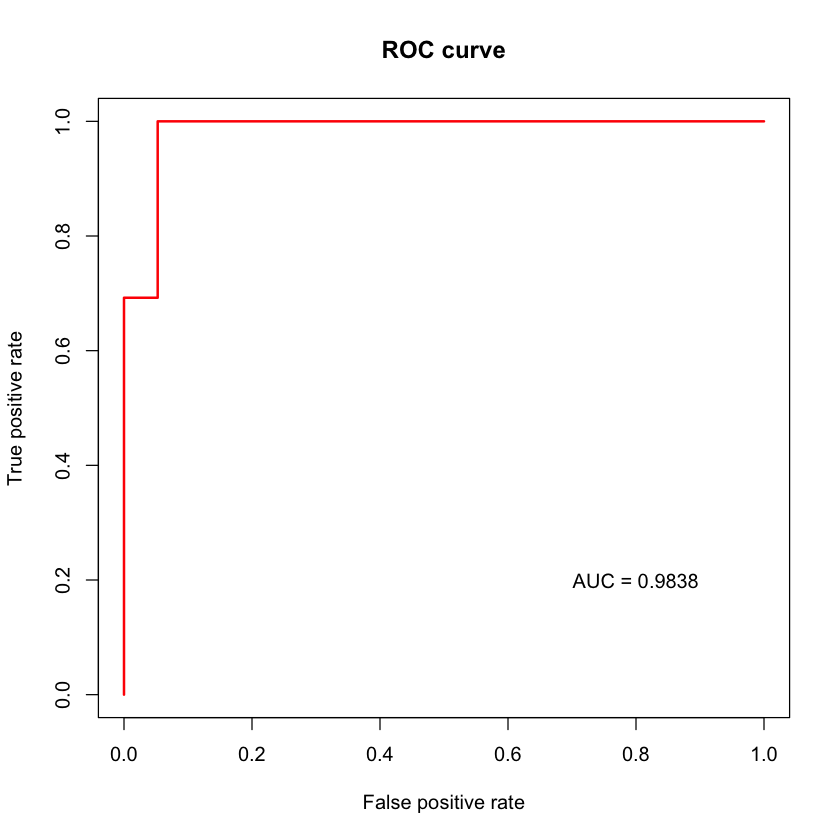

In [27]:
## plot ROC curve
library(ROCR)
p <- predict(lr_model, newdata=input, type="response")
pr <- prediction(p, input$am)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf,main = "ROC curve",lwd = 2,col = "red")

library(pROC)
auc = auc(response = input$am,predictor = p)
text(0.8,0.2,labels = paste0("AUC = ",round(auc,4)))

## 2. Multi-group classification

Multinomial logistic regression can be implemented with mlogit() from mlogit package and multinom() from nnet package. We will use the latter for this example.

In [28]:
cmcData <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data", stringsAsFactors=FALSE, header=F)
colnames(cmcData) <- c("wife_age", "wife_edu", "hus_edu", "num_child", "wife_rel", "wife_work", "hus_occu", "sil", "media_exp", "cmc")
head(cmcData)

,wife_age,wife_edu,hus_edu,num_child,wife_rel,wife_work,hus_occu,sil,media_exp,cmc
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,24,2,3,3,1,1,2,3,0,1
2,45,1,3,10,1,1,3,4,0,1
3,43,2,3,7,1,1,3,4,0,1
4,42,3,2,9,1,1,3,3,0,1
5,36,3,3,8,1,1,3,2,0,1
6,19,4,4,0,1,1,3,3,0,1


In [29]:
# Prepare Training and Test Data
set.seed(100)
trainingRows <- sample(1:nrow(cmcData), 0.7*nrow(cmcData))
training <- cmcData[trainingRows, ]
test <- cmcData[-trainingRows, ]

In [30]:
library(nnet)
multinomModel <- multinom(cmc ~ ., data=training) # multinom Model
summary (multinomModel) # model summary


# weights:  33 (20 variable)
initial  value 1132.669270 
iter  10 value 1005.819763
iter  20 value 975.922721
final  value 974.824494 
converged


Call:
multinom(formula = cmc ~ ., data = training)

Coefficients:
  (Intercept)   wife_age  wife_edu     hus_edu num_child   wife_rel   wife_work
2  -3.2863389 -0.0475747 0.8641614  0.03270041 0.3143566 -0.4876721 -0.01258458
3   0.7014815 -0.1030796 0.3194865 -0.01320350 0.2836229 -0.2368861  0.13903133
    hus_occu       sil  media_exp
2 -0.1210229 0.3289317 -0.1245895
3  0.1346765 0.1527346 -0.6424231

Std. Errors:
  (Intercept)   wife_age  wife_edu   hus_edu  num_child  wife_rel wife_work
2   0.9333410 0.01436321 0.1335053 0.1637365 0.05029112 0.2375021 0.2005847
3   0.7513528 0.01318821 0.1018969 0.1199011 0.04445760 0.2408192 0.1795966
   hus_occu        sil media_exp
2 0.1156028 0.11741720  0.426903
3 0.1005491 0.08660681  0.316616

Residual Deviance: 1949.649 
AIC: 1989.649 

In [32]:
predicted_scores <- predict (multinomModel, test, "probs") # predict on new data
predicted_class <- predict (multinomModel, test)

In [33]:
table(predicted_class, test$cmc)

               
predicted_class   1   2   3
              1 118  28  46
              2  13  38  35
              3  61  30  73

In [34]:
# model accuracy
mean(predicted_class == test$cmc)

[1] 0.5180995